<a href="https://colab.research.google.com/github/desmond3546/ai-project/blob/main/ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd # For Tabular Data Manipulation.
import matplotlib.pyplot as plt # For Basic Visualization
import seaborn as sns # For Interactive Visualization and it was made top of matplotlib itself.
import numpy as np # For numeric python
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.preprocessing import OrdinalEncoder
import warnings # For Ignoring Warnings
warnings.filterwarnings('ignore')

DATA PREPROCESSING

In [3]:
# Read the CSV file
df = pd.read_csv("/expanded_yield_df.csv")

# Display the first five rows of the dataframe
print(df.head())

# Display information about the dataframe
print(df.info())

# Display descriptive statistics for the dataframe
print(df.describe())

# Display the number of missing values for each column
print(df.isnull().sum())

# Display the number of duplicate rows in the dataframe
print(df.duplicated().sum())

# Display the shape of the dataframe
print(df.shape)

      Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  solar_radiation  soil_organic_matter  \
0              121.0     16.37        16.869022             4.260704   
1              121.0     16.37        24.359286             5.669413   
2              121.0     16.37        21.515921             2.793724   
3              121.0     16.37        19.782560             5.574696   
4              121.0     16.37        14.028242             3.624651   

   soil_nitrogen  soil_phosphorus  soil_potassium  
0       0.272238         0.010491        1.205183  


DATA VISULISATION

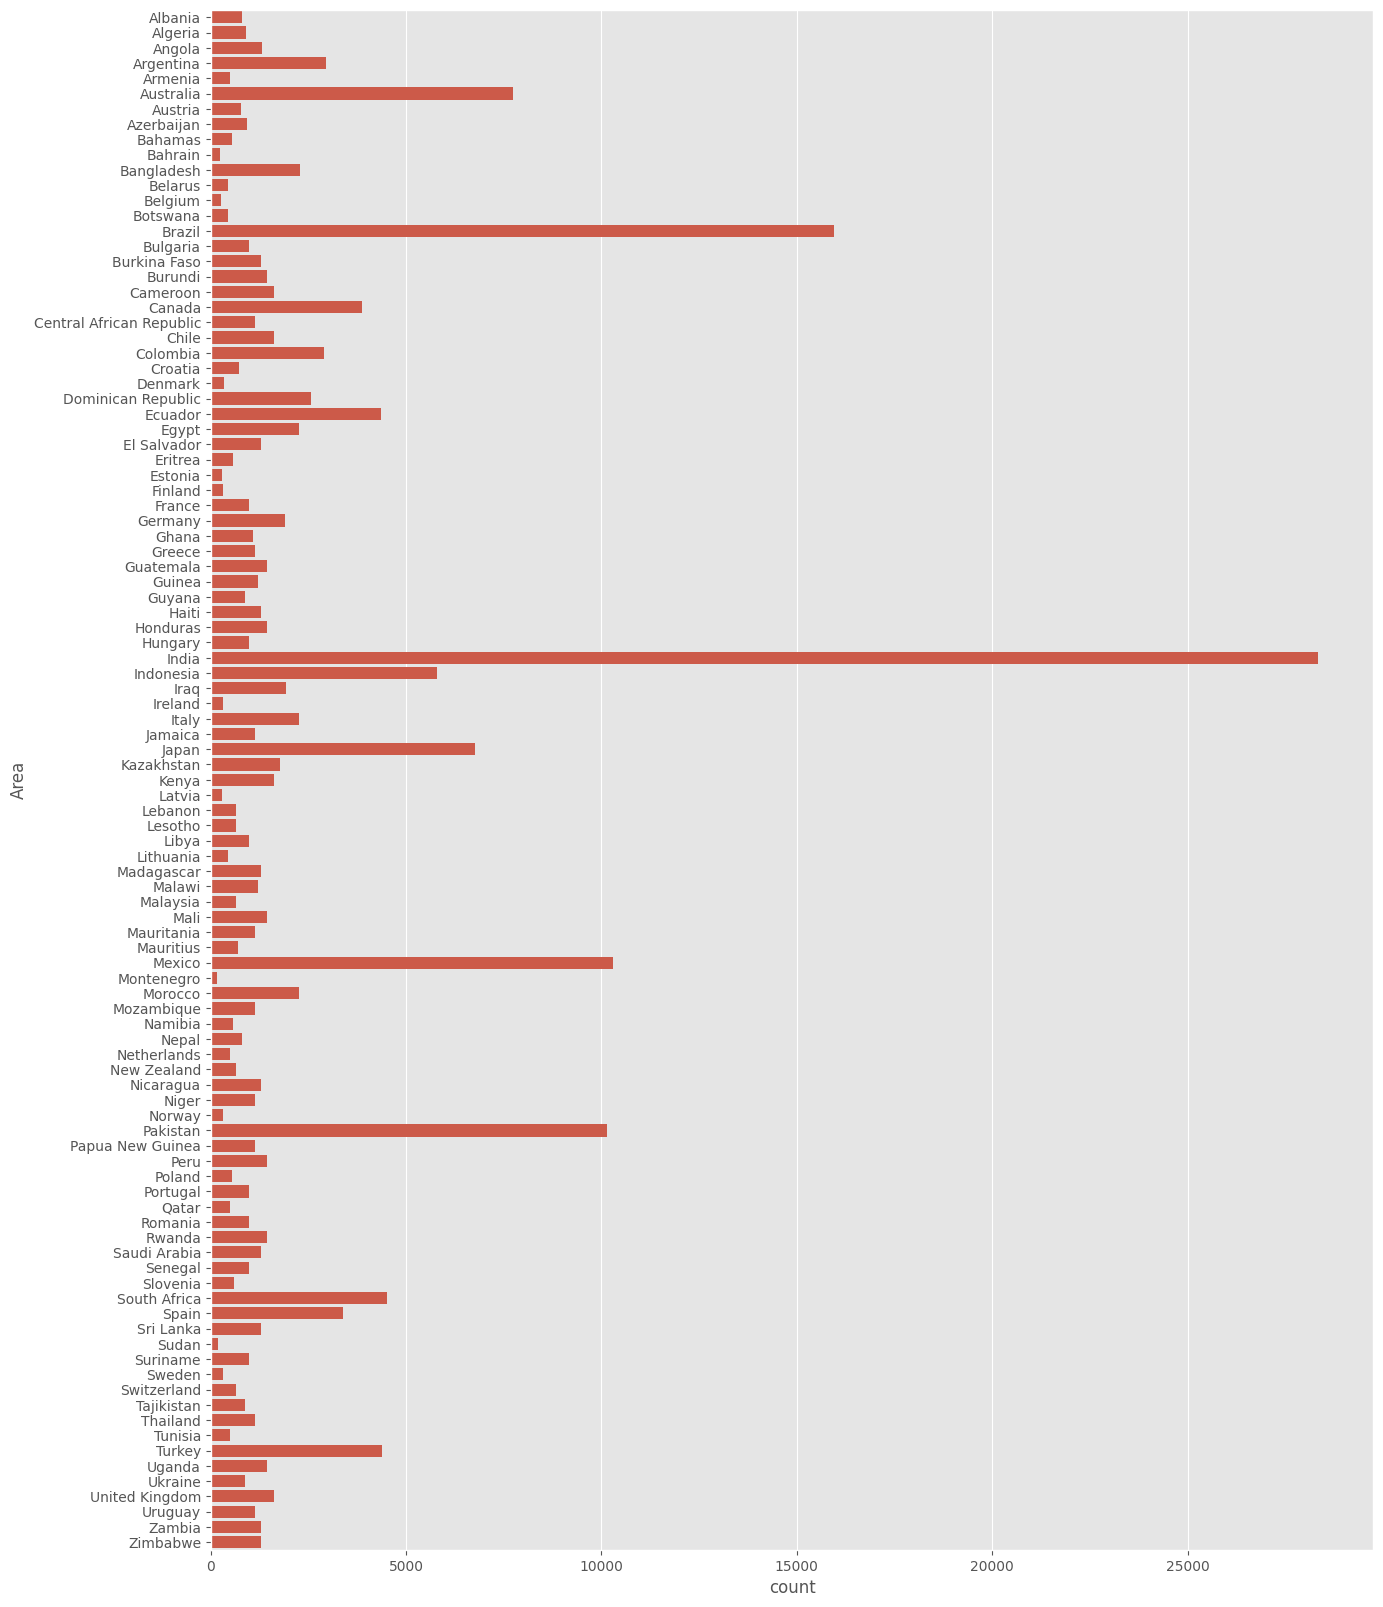

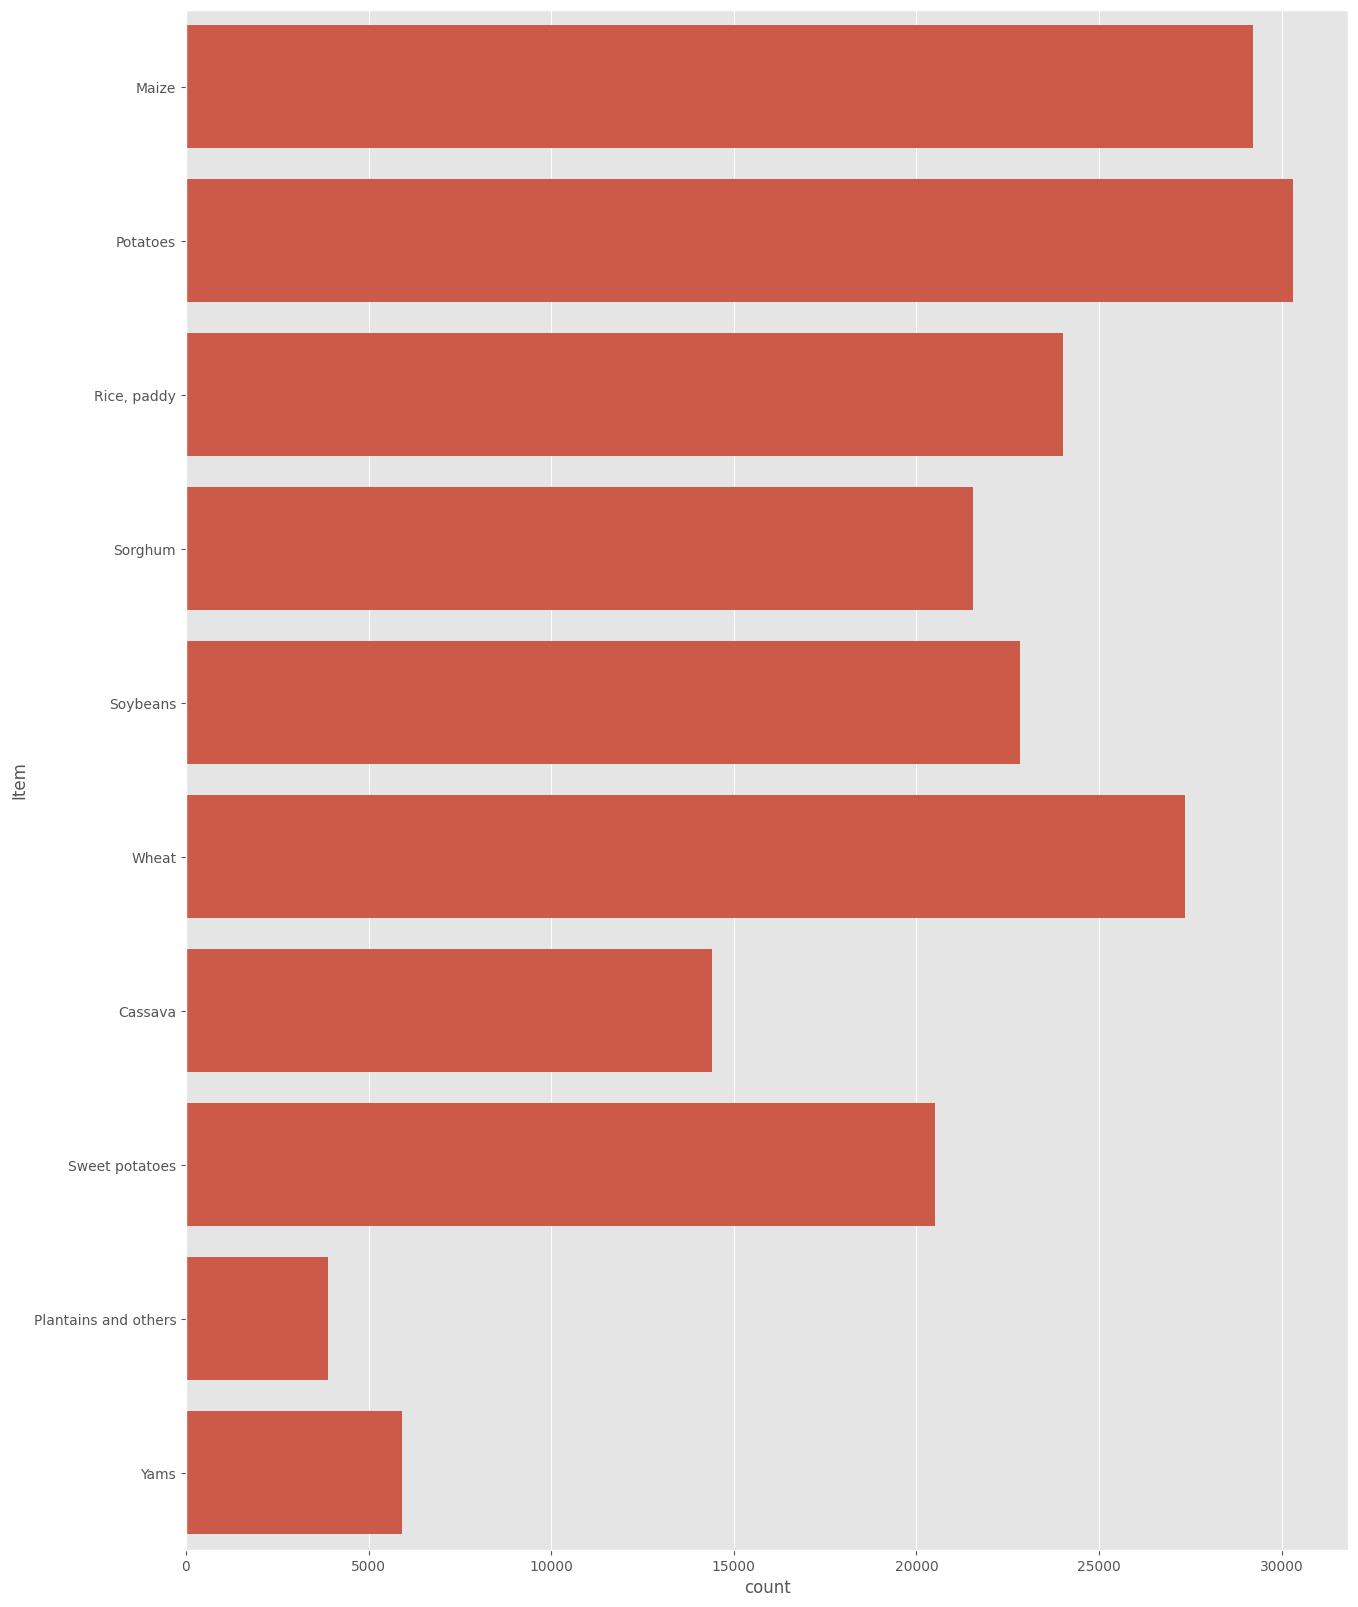

Total yield of all countries combined :  15433006144
total yield per country:  [45692288, 53691712, 45780504, 262912256, 36192800, 872888496, 86818064, 36867040, 35077736, 35551112, 119172934, 32933684, 59095890, 3294557, 1172852142, 43841525, 42583359, 49218022, 75025181, 242948454, 29789389, 143928498, 188489966, 42582169, 74911557, 177185162, 149209137, 257801936, 117991608, 10166912, 25169466, 43474676, 110534326, 271463241, 64822597, 102003475, 115561061, 55830201, 58527721, 60334358, 76440917, 61768770, 2291942268, 484354542, 76893054, 63728210, 225964900, 137886049, 871296384, 69756484, 100742159, 25890116, 48697628, 29812524, 63114016, 29220436, 42724661, 58427005, 55544874, 105747040, 31260887, 88789484, 915519696, 11515700, 155211070, 48748189, 22158325, 28795991, 98605031, 123604096, 89734589, 86214289, 47049135, 517282038, 75109503, 106413370, 45952977, 85080429, 41969382, 42043092, 54187371, 106203202, 72398739, 50379091, 289331924, 327414780, 78524187, 13274422, 103505276

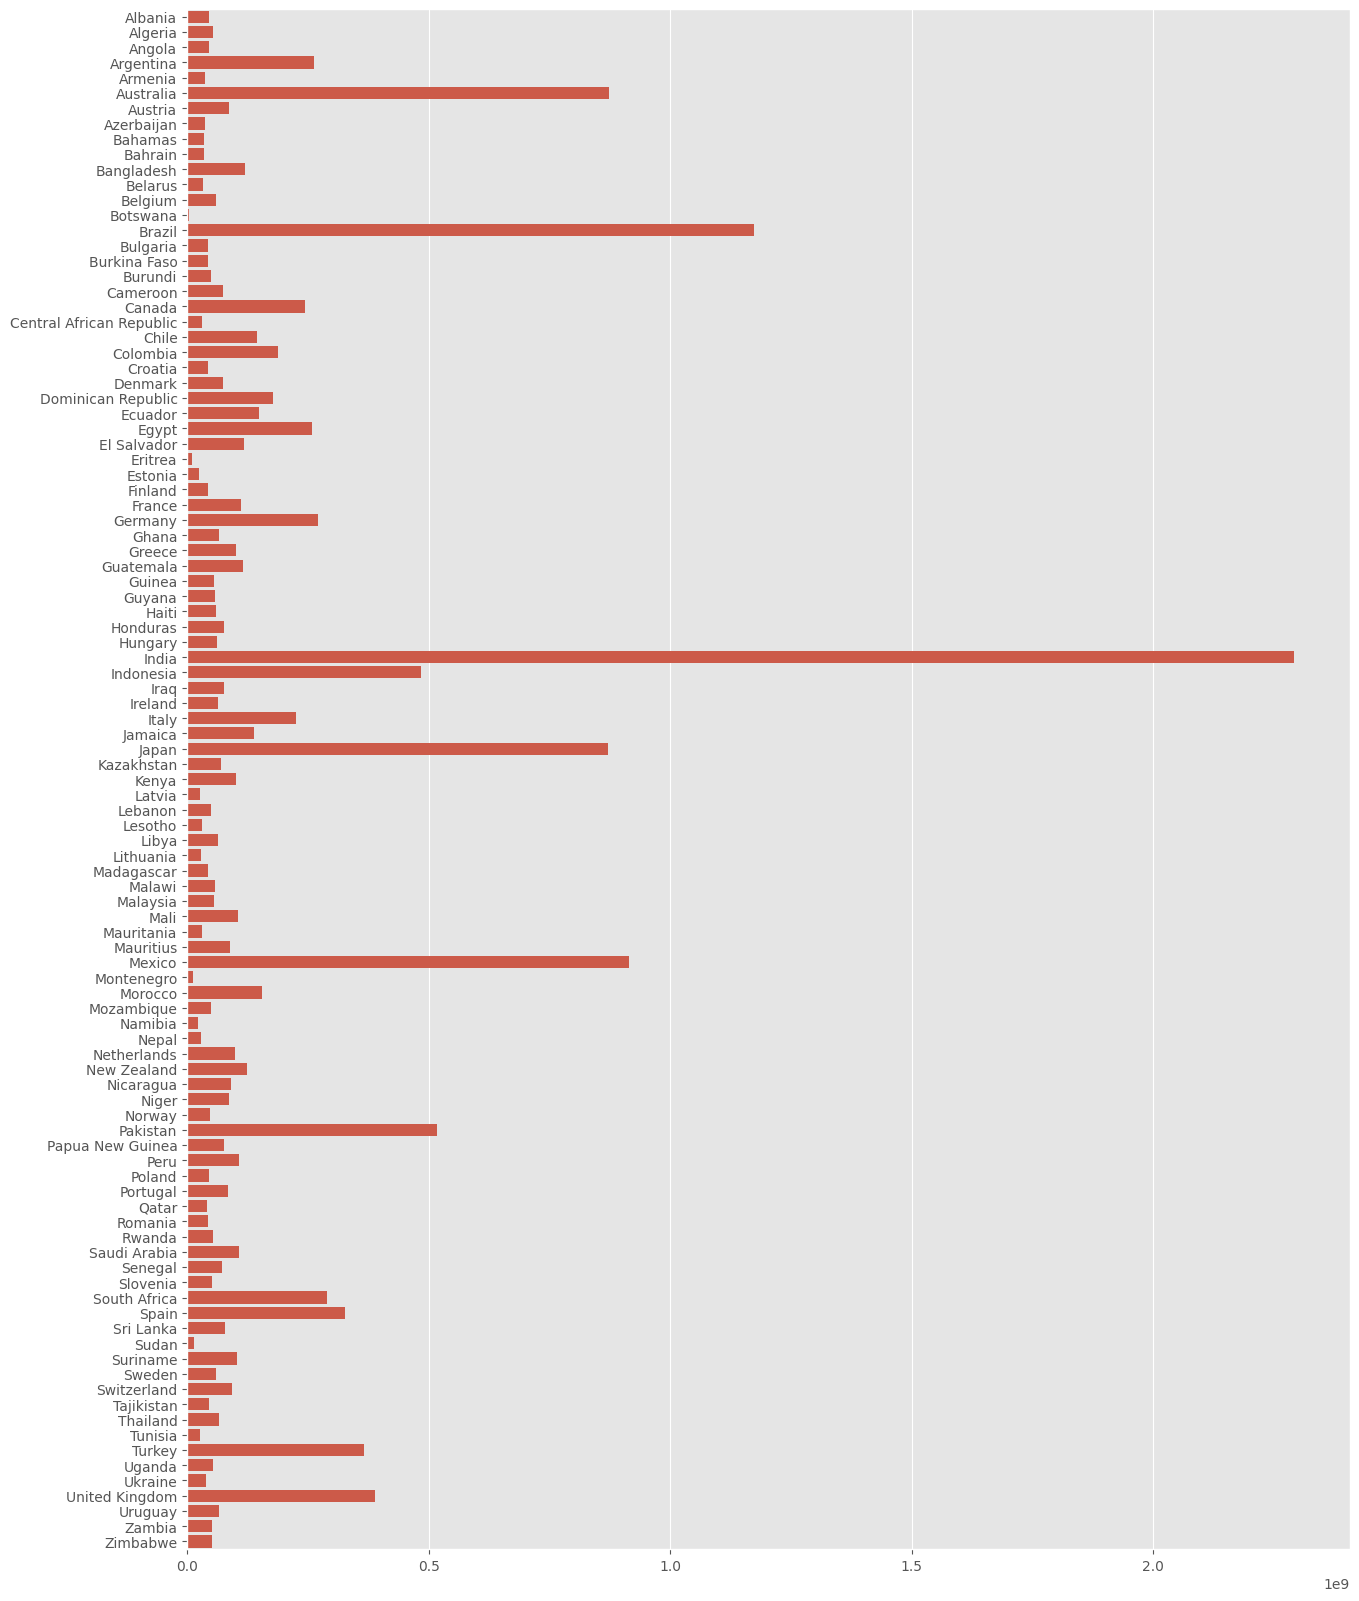

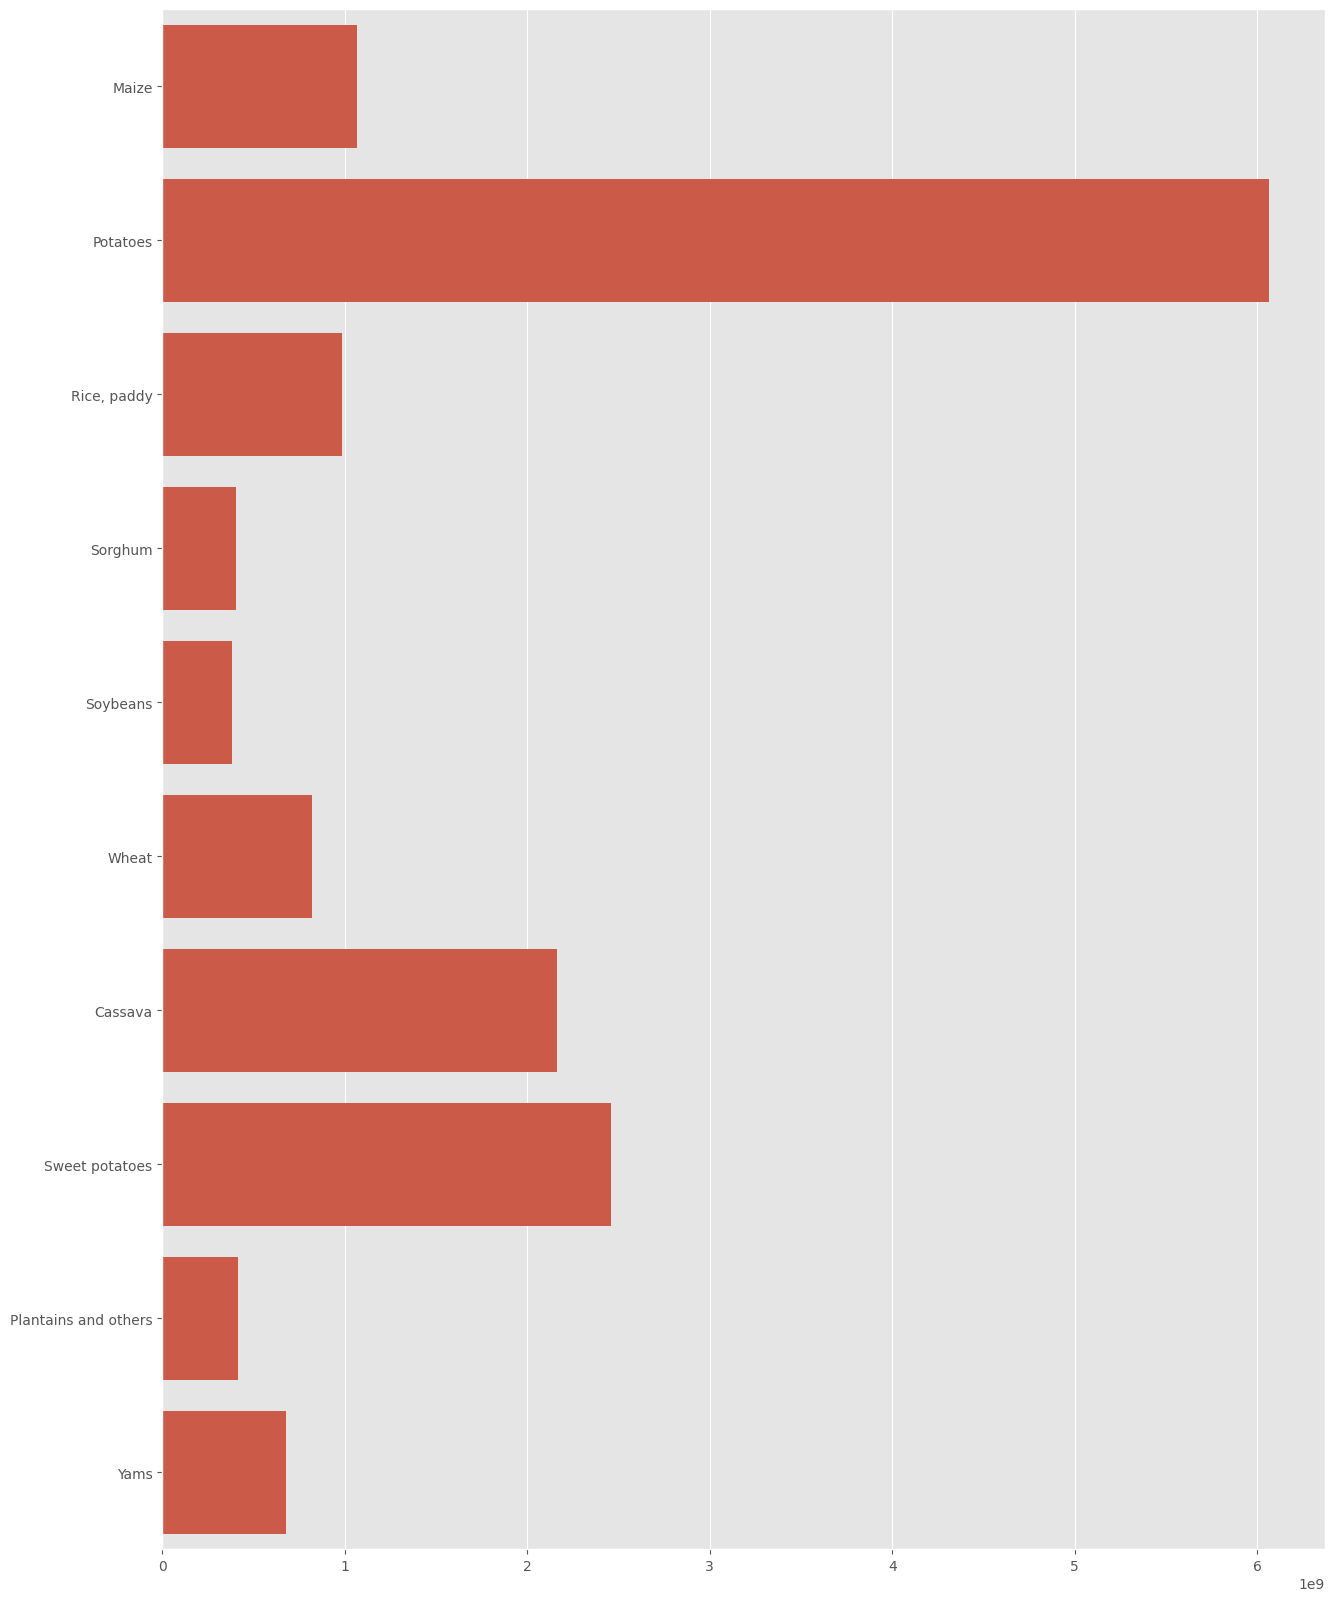

In [10]:
# Plot the count of each unique value in the 'Area' column
plt.figure(figsize=(15,20))
sns.countplot(y = df['Area'])
plt.show()

# Plot the count of each unique value in the 'Item' column
plt.figure(figsize=(15,20))
sns.countplot(y = df['Item'])
plt.show()

# Calculate the total yield per country
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

# Display the total yield of all countries combined
print("Total yield of all countries combined : ", df['hg/ha_yield'].sum())


# Display the total yield per country
print("total yield per country: ", yield_per_country)


# Plot the total yield per country
plt.figure(figsize=(15,20))
sns.barplot(y = country, x = yield_per_country)
plt.show()

# Calculate the total yield per crop
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

# Plot the total yield per crop
plt.figure(figsize=(15,20))
sns.barplot(y = crops, x = yield_per_crop)
plt.show()


DATA TRAINING AND ENCODING

In [5]:
print(df.columns)

# Reorder columns to the specified order
col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'solar_radiation',
       'soil_organic_matter', 'soil_nitrogen', 'soil_phosphorus', 'soil_potassium', 'Area', 'Item', 'hg/ha_yield']
df = df[col]

# Display the first five rows of the reordered dataframe
print(df.head())

# Split the data into features and target variable
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True)

# Import preprocessing libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define the OneHotEncoder and StandardScaler
ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

# Create a ColumnTransformer to preprocess the data
preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3,4,5,6,7,8]), # Apply StandardScaler to numerical columns
        ('OneHotEncode', ohe, [9,10]) # Apply OneHotEncoder to categorical columns
    ],
    remainder = 'passthrough'
)

# Fit and transform the training data
X_train_dummy = preprocesser.fit_transform(X_train)
# Transform the testing data
X_test_dummy  = preprocesser.transform(X_test)

# Display the feature names after transformation
preprocesser.get_feature_names_out(col[:-1])

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'solar_radiation',
       'soil_organic_matter', 'soil_nitrogen', 'soil_phosphorus',
       'soil_potassium'],
      dtype='object')
   Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
0  1990                         1485.0              121.0     16.37   
1  1990                         1485.0              121.0     16.37   
2  1990                         1485.0              121.0     16.37   
3  1990                         1485.0              121.0     16.37   
4  1990                         1485.0              121.0     16.37   

   solar_radiation  soil_organic_matter  soil_nitrogen  soil_phosphorus  \
0        16.869022             4.260704       0.272238         0.010491   
1        24.359286             5.669413       0.128928         0.058924   
2        21.515921             2.793724       0.062977         0.235395   
3        19.782560   

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'StandardScale__solar_radiation',
       'StandardScale__soil_organic_matter',
       'StandardScale__soil_nitrogen', 'StandardScale__soil_phosphorus',
       'StandardScale__soil_potassium', 'OneHotEncode__Area_Algeria',
       'OneHotEncode__Area_Angola', 'OneHotEncode__Area_Argentina',
       'OneHotEncode__Area_Armenia', 'OneHotEncode__Area_Australia',
       'OneHotEncode__Area_Austria', 'OneHotEncode__Area_Azerbaijan',
       'OneHotEncode__Area_Bahamas', 'OneHotEncode__Area_Bahrain',
       'OneHotEncode__Area_Bangladesh', 'OneHotEncode__Area_Belarus',
       'OneHotEncode__Area_Belgium', 'OneHotEncode__Area_Botswana',
       'OneHotEncode__Area_Brazil', 'OneHotEncode__Area_Bulgaria',
       'OneHotEncode__Area_Burkina Faso', 'OneHotEncode__Area_Burundi',
       'OneHotEncode__Area_Cameroon', 'OneHotEncode__Area_Canada'

APPLYING REGRESSION MODELS

In [9]:
# Import regression models and metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, mean_squared_error

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train_dummy, y_train)

# Reset index of target variables
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Predict the target variable for the test set
y_pred_lr = lr.predict(X_test_dummy)

# Display performance metrics for the Linear Regression model
print("Linear Regression Results")
print("Accuracy Score at training data : ", lr.score(X_train_dummy, y_train))
print("Accuracy score at testing data : ", lr.score(X_test_dummy, y_test))
print("R2 Score : ", r2_score(y_test, y_pred_lr))
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error : ", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ", rmse)
mae = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error : ", mae)

# Initialize and train the Lasso Regression model
la = Lasso()
la.fit(X_train_dummy, y_train)

# Predict the target variable for the test set
y_pred_la = la.predict(X_test_dummy)

# Display performance metrics for the Lasso Regression model
print("\nLasso Regression Results")
print("Accuracy Score at training data : ", la.score(X_train_dummy, y_train))
print("Accuracy score at testing data : ", la.score(X_test_dummy, y_test))
print("R2 Score : ", r2_score(y_test, y_pred_la))
mse = mean_squared_error(y_test, y_pred_la)
print("Mean Squared Error : ", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ", rmse)
mae = mean_absolute_error(y_test, y_pred_la)
print("Mean Absolute Error : ", mae)

# Initialize and train the Ridge Regression model
rig = Ridge()
rig.fit(X_train_dummy, y_train)

# Predict the target variable for the test set
y_pred_rig = rig.predict(X_test_dummy)

# Display performance metrics for the Ridge Regression model
print("\nRidge Regression Results")
print("Accuracy Score at training data : ", rig.score(X_train_dummy, y_train))
print("Accuracy score at testing data : ", rig.score(X_test_dummy, y_test))
print("R2 Score : ", r2_score(y_test, y_pred_rig))
print("Adjusted R2 : ", 1 - (1 - r2_score(y_test, y_pred_rig)) * ((X_test_dummy.shape[0] - 1) / (X_test_dummy.shape[0] - X_test_dummy.shape[1] - 1)))
mse = mean_squared_error(y_test, y_pred_rig)
print("Mean Squared Error : ", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ", rmse)
mae = mean_absolute_error(y_test, y_pred_rig)
print("Mean Absolute Error : ", mae)

# Initialize and train the Decision Tree Regressor model
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train_dummy, y_train)

# Predict the target variable for the test set
y_pred_dt = dtr.predict(X_test_dummy)

# Display performance metrics for the Decision Tree Regressor model
print("\nDecision Tree Regression Results")
print("Accuracy Score at training data : ", dtr.score(X_train_dummy, y_train))
print("Accuracy score at testing data : ", dtr.score(X_test_dummy, y_test))
print("R2 Score : ", r2_score(y_test, y_pred_dt))
print("Adjusted R2 : ", 1 - (1 - r2_score(y_test, y_pred_dt)) * ((X_test_dummy.shape[0] - 1) / (X_test_dummy.shape[0] - X_test_dummy.shape[1] - 1)))
mse = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error : ", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is : ", rmse)
mae = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error : ", mae)


Linear Regression Results
Accuracy Score at training data :  0.755830414687432
Accuracy score at testing data :  0.7578789401834085
R2 Score :  0.7578789401834085
Mean Squared Error :  1746770582.2161515
Root Mean Squared Error is :  41794.38457755002
Mean Absolute Error :  29307.100035258245

Lasso Regression Results
Accuracy Score at training data :  0.7558180306896108
Accuracy score at testing data :  0.7578961640238495
R2 Score :  0.7578961640238495
Mean Squared Error :  1746646321.658983
Root Mean Squared Error is :  41792.89798110419
Mean Absolute Error :  29288.666349096788

Ridge Regression Results
Accuracy Score at training data :  0.7558292115924141
Accuracy score at testing data :  0.7578844310476716
R2 Score :  0.7578844310476716
Adjusted R2 :  0.757168058912159
Mean Squared Error :  1746730968.6436145
Root Mean Squared Error is :  41793.910664636474
Mean Absolute Error :  29300.943770182217

Decision Tree Regression Results
Accuracy Score at training data :  1.0
Accuracy s

Function to make yield predictions based on input features

In [7]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, solar_radiation, soil_organic_matter, soil_nitrogen, soil_phosphorus, soil_potassium, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, solar_radiation, soil_organic_matter, soil_nitrogen, soil_phosphorus, soil_potassium, Area, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yield = dtr.predict(transform_features).reshape(-1, 1)
    return predicted_yield[0][0]

# Test the prediction function
result = prediction(1990, 1485.0, 121.0, 16.37, 16.8690215450157, 4.26070373606214, 0.2722382654168, 0.0104913847700532, 1.20518328798317, 'Albania', 'Maize')
print(result)

36613.0


MAKING PICKLE FILES FOR FRONT END

In [8]:
# Save the Decision Tree Regressor model and the preprocesser
import pickle
pickle.dump(dtr, open("dtr.pkl", "wb"))
pickle.dump(preprocesser, open("preprocesser.pkl", "wb"))
